In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline

plt.rcParams["figure.figsize"] = [15,6]

In [3]:
# Load Data
input_dir = "./data/"

# Load my data
train_file = os.path.join(input_dir, "train.csv")
test_file = os.path.join(input_dir, "test.csv")

train = pd.read_csv(train_file)
test = pd.read_csv(test_file)

# Split
X = train.iloc[:,1:]
y = train.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("feature:", X_train.shape[1])
print("outputs:", sorted(y.unique()))
print("train:", X_train.shape[0])
print("valid:", X_test.shape[0])

feature: 784
outputs: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
train: 33600
valid: 8400


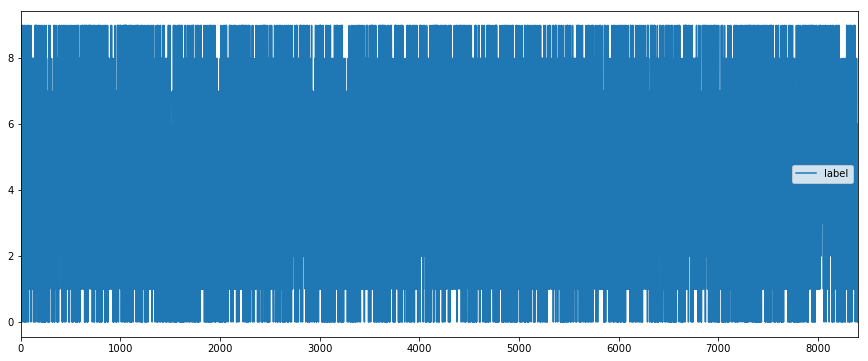

In [27]:
pd.DataFrame(y_test).reset_index(drop=True).plot()

## Lasso

Reference: http://scikit-learn.org/stable/modules/linear_model.html#lasso

In [28]:
from sklearn import linear_model

reg = linear_model.Lasso(alpha = 0.1)
reg.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

[ 2.38436186 -0.76427569  3.47591499 ...,  1.58217907  5.61635695
  3.52332026]


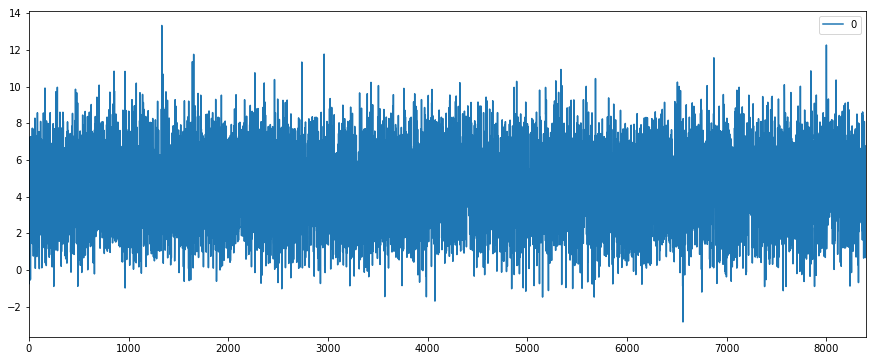

In [32]:
print(reg.predict(X_test))

pd.DataFrame(reg.predict(X_test)).reset_index(drop=True).plot()

Problem here is the predictions are not mapping to the output classes.

In [6]:
np.sum(np.round(reg.predict(X_test)) == y_test) / len(y_test)

0.22261904761904761

Even with rounding the predictions, we do not get high accuracy.

----

In documentation they point us to `LassoLars`

Reference: http://scikit-learn.org/stable/modules/linear_model.html#least-angle-regression

In [34]:
reg = linear_model.LassoLars(alpha=.1)
reg.fit(X_train, y_train)

LassoLars(alpha=0.1, copy_X=True, eps=2.2204460492503131e-16,
     fit_intercept=True, fit_path=True, max_iter=500, normalize=True,
     positive=False, precompute='auto', verbose=False)

[ 4.44324405  4.44324405  4.44324405 ...,  4.44324405  4.44324405
  4.44324405]


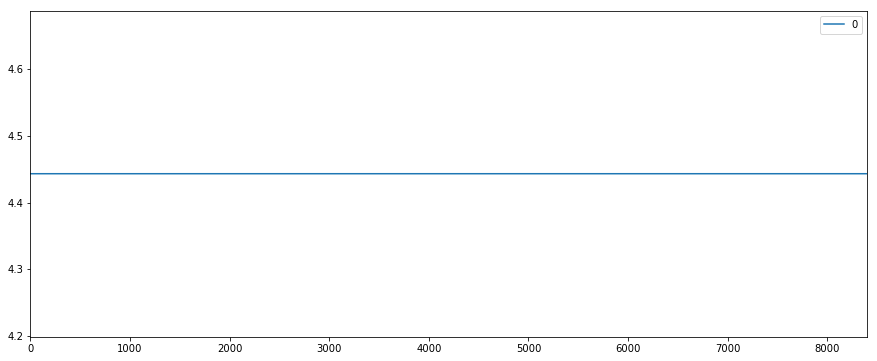

In [35]:
print(reg.predict(X_test))

pd.DataFrame(reg.predict(X_test)).reset_index(drop=True).plot()

Same problem

In [10]:
np.sum(np.round(reg.predict(X_test)) == y_test) / len(y_test)

0.094285714285714292

Worst accuracy

----

In [40]:
from sklearn.linear_model import Lasso

In [41]:
clf = Lasso(alpha=0.1)
clf.fit(X_train, y_train) 

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

[ 2.38436186 -0.76427569  3.47591499 ...,  1.58217907  5.61635695
  3.52332026]


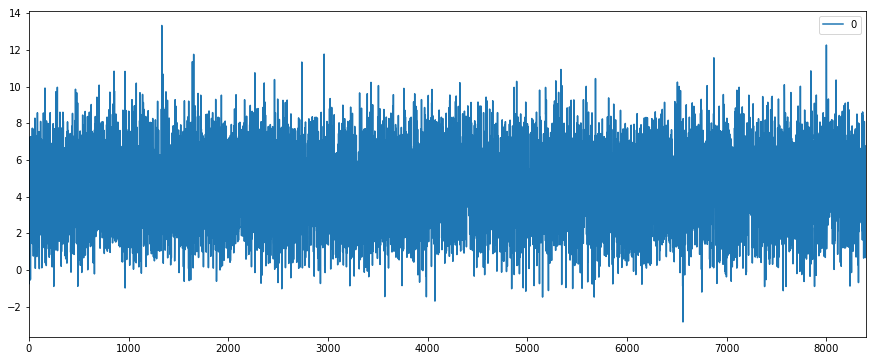

In [43]:
print(clf.predict(X_test))

pd.DataFrame(clf.predict(X_test)).reset_index(drop=True).plot()